In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import glob
import act
import matplotlib.pyplot as plt
import xarray as xr
import scipy.signal
import datetime as dt
import scipy
import altair as alt
import swifter

# User Inputs

In [23]:
# This data was put here and cleaned using the `doppler_lidar_mass_download.py` script
# input_directory = '/data2/elilouis/sublimationofsnow/gucdlfptM1.b1/winter/downsampled'
# input_directory = '/data2/elilouis/sublimationofsnow/gucdlfptM1.b1/spring/downsampled'
input_directory = '/data2/elilouis/sublimationofsnow/gucdlfptM1.b1/alldatatodate/downsampled/'

epoch_time = dt.datetime(1970, 1, 1)

# Plan including 20 minutes of vertical staring in 4 separate chunks of 5 minutes
# plan_1_vertical_staring_minutes = [
#     15,16,17,18,19,24,25,26,27,28,45,46,47,48,49,54,55,56,57,58
# ]
# Plan including 20 minutes of vertical staring in 2 separate chunks of 3 and 2 separate chunks of 7 minutes
plan_2_vertical_staring_minutes = [
    11,12,13,22,23,24,25,26,27,28,41,42,43,52,53,54,55,56,57,58
]

In [3]:
if 'alldatatodate' in input_directory:
    dl_fpt_files = glob.glob(os.path.join(input_directory, '*/*.cdf'), recursive=True)
else:
    dl_fpt_files = glob.glob(os.path.join(input_directory, '*.cdf'), recursive=True)
dl_fpt_files = [str(f) for f in dl_fpt_files]

In [4]:
dl_fpt = act.io.armfiles.read_netcdf(dl_fpt_files)

ERROR 1: PROJ: proj_create_from_database: Open of /home/elilouis/mambaforge/envs/arm/share/proj failed


In [6]:
dl_fpt

<xarray.Dataset>
Dimensions:                 (range: 133, time: 77856)
Coordinates:
  * range                   (range) float32 15.0 45.0 ... 3.945e+03 3.975e+03
  * time                    (time) datetime64[ns] 2022-05-01T00:01:00 ... 202...
Data variables:
    base_time               (time) object dask.array<chunksize=(53,), meta=np.ndarray>
    qc_time                 (time) float64 dask.array<chunksize=(53,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(53,), meta=np.ndarray>
    elevation               (time) float32 dask.array<chunksize=(53,), meta=np.ndarray>
    radial_velocity         (time, range) float32 dask.array<chunksize=(53, 133), meta=np.ndarray>
    qc_radial_velocity      (time, range) float64 dask.array<chunksize=(53, 133), meta=np.ndarray>
    intensity               (time, range) float32 dask.array<chunksize=(53, 133), meta=np.ndarray>
    attenuated_backscatter  (time, range) float32 dask.array<chunksize=(53, 133), meta=np.ndarray>
    lat                     (time) float32 dask.array<chunksize=(53,), meta=np.ndarray>
    lon                     (time) float32 dask.array<chunksize=(53,), meta=np.ndarray>
    alt                     (time) float32 dask.array<chunksize=(53,), meta=np.ndarray>
Attributes: (12/34)
    command_line:                dl_ingest --max-runtime 0 -s guc -f M1
    process_version:             ingest-dl-2.21-0.el7
    dod_version:                 dlfpt-b1-1.1
    site_id:                     guc
    facility_id:                 M1: Mt Crested Butte, Colorado
    input_source:                /data/collection/guc/gucdlM1.00/Stare_193_20...
    ...                          ...
    target_altitude:             2881.000000
    history:                     created by user dsmgr on machine procnode2 a...
    _file_dates:                 ['20220501', '20220501', '20220501', '202205...
    _file_times:                 ['000102', '010102', '020102', '030102', '04...
    _datastream:                 gucdlfptM1.b1
    _arm_standards_flag:         1

In [5]:
dl_fpt.time.min(), dl_fpt.time.max()

(<xarray.DataArray 'time' ()>
 array('2022-05-01T00:01:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'time' ()>
 array('2022-06-29T23:59:00.000000000', dtype='datetime64[ns]'))

In [ ]:
dl_fpt_plotting = dl_fpt.resample(time='240Min').mean()


display = act.plotting.TimeSeriesDisplay(
    {'Gothic Doppler LiDAR': dl_fpt_plotting},
    subplot_shape=(1,),
    figsize=(10, 5),
)

display.plot(
    'radial_velocity',
    dsname='Gothic Doppler LiDAR',
    cmap='gist_ncar',
    vmin=-3,
    vmax=3,
    subplot_index=(0,)
)


In [ ]:
if 'winter' in input_directory:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-01-01', '2022-01-31'))
elif 'spring' in input_directory:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-05-01', '2022-05-31'))
else:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-01-01', '2022-01-31'))

dl_fpt_plotting = dl_fpt_plotting.resample(time='60Min').mean()

display = act.plotting.TimeSeriesDisplay(
    {'Gothic Doppler LiDAR': dl_fpt_plotting},
    subplot_shape=(1,),
    figsize=(10, 5),
)

display.plot(
    'radial_velocity',
    dsname='Gothic Doppler LiDAR',
    cmap='gist_ncar',
    vmin=-3,
    vmax=3,
    subplot_index=(0,)
)


In [ ]:
if 'winter' in input_directory:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-01-04', '2022-01-04'))
elif 'spring' in input_directory:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-05-05', '2022-05-05'))
else:
    dl_fpt_plotting = dl_fpt.sel(time=slice('2022-01-04', '2022-01-04'))

dl_fpt_plotting = dl_fpt_plotting.resample(time='1Min').mean()

display = act.plotting.TimeSeriesDisplay(
    {'Gothic Doppler LiDAR': dl_fpt_plotting},
    subplot_shape=(1,),
    figsize=(10, 5),
)

display.plot(
    'radial_velocity',
    dsname='Gothic Doppler LiDAR',
    cmap='gist_ncar',
    vmin=-3,
    vmax=3,
    subplot_index=(0,)
)


# Create DF

In [7]:
src_fpt = dl_fpt.to_dataframe().reset_index()

# Save the DF to save time on future runs

In [8]:
if 'winter' in input_directory:
    src_fpt.to_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_winter.pkl')
elif 'spring' in input_directory:
    src_fpt.to_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_spring.pkl')
else:
    src_fpt.to_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_alldata.pkl')


In [24]:
if 'winter' in input_directory:
    src_fpt = pd.read_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_winter.pkl')
elif 'spring' in input_directory:
    src_fpt = pd.read_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_spring.pkl')
else:
    src_fpt = pd.read_pickle('/data2/elilouis/sublimationofsnow/doppler_lidar_vertical_staring/vertical_staring_alldata.pkl')


In [26]:
src_fpt.time.min(), src_fpt.time.max()

(Timestamp('2021-09-01 00:01:00'), Timestamp('2023-01-15 19:59:00'))

/tmp/ipykernel_61136/1522930644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(src_fpt['radial_velocity'])


<AxesSubplot: xlabel='radial_velocity', ylabel='Density'>

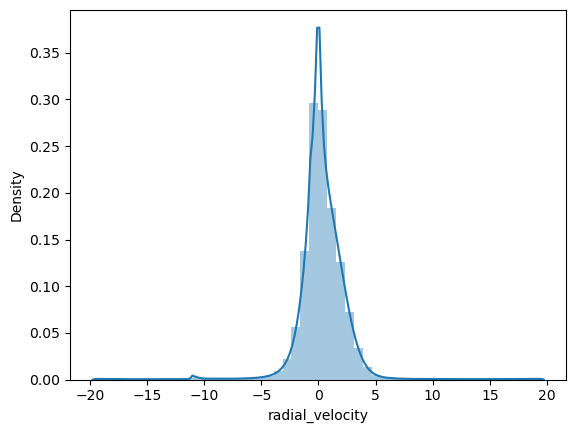

In [28]:
sns.distplot(src_fpt['radial_velocity'])

In [10]:
print(len(src_fpt))

10354848


## Filter SNR and Outliers (|u| < 5 m/s)

In [11]:
src_fpt['time'].min(), src_fpt['time'].max()

(Timestamp('2022-05-01 00:01:00'), Timestamp('2022-06-29 23:59:00'))

In [12]:
src_fpt['SNR'] = src_fpt['intensity'] - 1
src_fpt = src_fpt.query('SNR > 0.008')
print(len(src_fpt))
src_fpt = src_fpt[np.abs(src_fpt['radial_velocity']) < 5]
print(len(src_fpt))

4832860
4781931


# Create "modeled" dataset representing the proposed loss of data (for other scans)

In [13]:
src_fpt['minutes'] = src_fpt['time'].dt.minute
 
# src_fpt_plan_1 = src_fpt[src_fpt['minutes'].isin(plan_1_vertical_staring_minutes)]

src_fpt_plan_2 = src_fpt[src_fpt['minutes'].isin(plan_2_vertical_staring_minutes)]

# Calculate statistics at each range value

In [14]:
src_fpt_var = src_fpt.groupby('range').var().reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='variance', mode='Existing Plan')
src_fpt_plan_2_var = src_fpt_plan_2.groupby('range').var().reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='variance', mode='New Plan')
src_fpt_skew = src_fpt.groupby('range').skew().reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='skew', mode='Existing Plan')
src_fpt_plan_2_skew = src_fpt_plan_2.groupby('range').skew().reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='skew', mode='New Plan')
src_fpt_kurt = src_fpt.groupby('range').apply(pd.DataFrame.kurt).drop(columns='range').reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='kurtosis', mode='Existing Plan')
src_fpt_plan_2_kurt = src_fpt_plan_2.groupby('range').apply(pd.DataFrame.kurt).drop(columns='range').reset_index()[['range', 'radial_velocity']].rename(
    columns={'radial_velocity': 'value'}
).assign(statistic='kurtosis', mode='New Plan')

statistics_df = pd.concat([src_fpt_var,src_fpt_plan_2_var,src_fpt_skew,src_fpt_plan_2_skew,src_fpt_kurt,src_fpt_plan_2_kurt]).rename(columns={'mode': 'Scan Plan'})

In [15]:
alt.Chart(statistics_df).mark_line().encode(
    alt.X('value:Q', sort='-y'),
    alt.Y('range:Q', title='Range (m)'),
    alt.Color('Scan Plan:N')
).properties(
   width=200,
   height=200 
).facet(
    alt.Column(
        'statistic:N',
        sort=['variance', 'skew', 'variance']
    )
).resolve_scale(
    x='independent'
)

alt.FacetChart(...)

# Calculate power spectrum for each range value

In [16]:
frequencies = np.logspace(-7,-2, 100)


## Insert epoch time (in seconds)

In [17]:
src_fpt['epoch_seconds'] = (src_fpt['time'] - epoch_time).dt.total_seconds()
src_fpt_plan_2['epoch_seconds'] = (src_fpt_plan_2['time'] - epoch_time).dt.total_seconds()

/tmp/ipykernel_61136/1985973048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  src_fpt_plan_2['epoch_seconds'] = (src_fpt_plan_2['time'] - epoch_time).dt.total_seconds()


In [18]:
def groupby_power_spectra(df, groupby_col, time_index_col, data_col, frequencies):
    ps_df = df.groupby(groupby_col).apply(
        lambda df: scipy.signal.lombscargle(
            df[time_index_col], 
            df[data_col] - df[data_col].mean(),
            frequencies,
            normalize=True
        )
    )
    ps_df = pd.DataFrame(dict(ps_df)).transpose().reset_index().rename(columns={'index': groupby_col}).melt(groupby_col).rename(columns={'value': 'Spectral Power'})
    ps_df['frequency'] = ps_df['variable'].apply(lambda n: frequencies[n])
    return ps_df.drop(columns='variable')

In [19]:
src_fpt_ps = groupby_power_spectra(src_fpt, 'range', 'epoch_seconds', 'radial_velocity', frequencies)
src_fpt_plan_2_ps = groupby_power_spectra(src_fpt_plan_2, 'range', 'epoch_seconds', 'radial_velocity', frequencies)

## Average power spectra for range bins

In [20]:
src_fpt_ps['range_group'] = pd.cut(
    src_fpt_ps['range'],
    [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
    labels=[250, 750, 1250, 1750, 2250, 2750, 3250, 3750]
)

src_fpt_plan_2_ps['range_group'] = pd.cut(
    src_fpt_plan_2_ps['range'],
    [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
    labels=[250, 750, 1250, 1750, 2250, 2750, 3250, 3750]
)

In [21]:
src_fpt_ps_mean = src_fpt_ps.drop(columns='range').groupby(['range_group', 'frequency']).mean().reset_index()
src_fpt_ps_mean['Scan Plan'] = 'Existing Plan'
src_fpt_plan_2_ps_mean = src_fpt_plan_2_ps.drop(columns='range').groupby(['range_group', 'frequency']).mean().reset_index()
src_fpt_plan_2_ps_mean['Scan Plan'] = 'New Plan'
power_spectra_df = pd.concat([src_fpt_ps_mean, src_fpt_plan_2_ps_mean])

In [22]:
psss = alt.Chart().mark_line(opacity=0.65).encode(
    alt.X('frequency:Q', scale=alt.Scale(type='log'), title='Frequency (hz)'),
    alt.Y('Spectral Power:Q', scale=alt.Scale(type='log', domain=[0.00001, 0.1])),
    alt.Color('Scan Plan:N')
).properties(height=150)

vertline_month = alt.Chart().mark_rule().encode(x='month:Q')
vertline_a = alt.Chart().mark_rule().encode(x='a:Q')
vertline_b = alt.Chart().mark_rule().encode(x='b:Q')
vertline_c = alt.Chart().mark_rule().encode(x='c:Q')
vertline_e = alt.Chart().mark_rule().encode(x='e:Q')
vertline_h = alt.Chart().mark_rule().encode(x='h:Q')
one_month = 1/(3600*24*30) 
one_week = 1/(3600*24*7)
one_day = 1/(3600*24)
two_hours = 1/(2*3600)
thirty_minutes = 1/(30*60)
five_minutes = 1/(5*60)

alt.layer(
    vertline_month, vertline_a, vertline_b, vertline_c, vertline_e, vertline_h,
    psss, 
    data=power_spectra_df
).transform_calculate(
    month=str(one_month),
    a=str(one_week),
    b=str(one_day),
    c=str(two_hours),
    e=str(thirty_minutes),
    h=str(five_minutes)
).facet(
    facet=alt.Facet('range_group:O', title='500-meter range bin'),
    columns=2,
    title='Power Spectrum of Radial Velocities from Vertically Staring Doppler LiDAR'
)

alt.FacetChart(...)